In [28]:
import numpy as np
import numba
from numba import cuda
import matplotlib.pyplot as plt
from matplotlib.image import imread
import time

# Define a Numba CUDA kernel for grayscale conversion
@cuda.jit
def grayscale(src, dst):
    # where are we in the input?
    tidx = cuda.threadIdx.x + cuda.blockIdx.x * cuda.blockDim.x
    g = np.uint8((src[tidx, 0] + src[tidx, 1] + src[tidx, 2]) / 3)
    dst[tidx, 0] = dst[tidx, 1] = dst[tidx, 2] = g


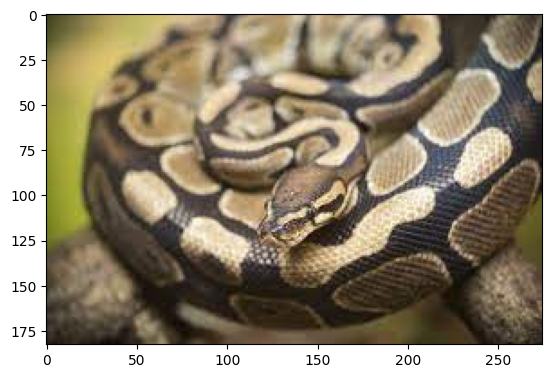

In [29]:
rgb_image = imread('python.jpg')
plt.imshow(rgb_image)

In [30]:
# Load an RGB image
rgb_image = imread('python.jpg')

# Flatten the image into a 1D array of RGB
imageWidth, imageHeight = rgb_image.shape[0], rgb_image.shape[1]
pixel_count = imageWidth * imageHeight
blockSize = 1024
gridSize = int(pixel_count / blockSize)

In [31]:
rgb_flat_1 = rgb_image.reshape(pixel_count, 3)
rgb_flat_1.shape

(50325, 3)

In [32]:
blocks = [2,4,8,16,32,64,128,256,512]
times = []

In [33]:
for b in blocks:
  start_time_gpu = time.time()
  devSrc = cuda.to_device(rgb_flat_1)
  devDst = cuda.device_array((pixel_count, 3), np.uint8)
  grayscale[gridSize, b](devSrc, devDst)
  hostDst = devDst.copy_to_host()
  gpu_time = time.time() - start_time_gpu
  times.append(gpu_time)

/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 49 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 49 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


In [40]:
devSrc = cuda.to_device(rgb_flat_1)
devDst = cuda.device_array((pixel_count, 3), np.uint8)
grayscale[gridSize, blockSize](devSrc, devDst)
hostDst = devDst.copy_to_host()
gpu_time = time.time() - start_time_gpu

In [41]:
new_image = hostDst.reshape(imageWidth, imageHeight, 3)

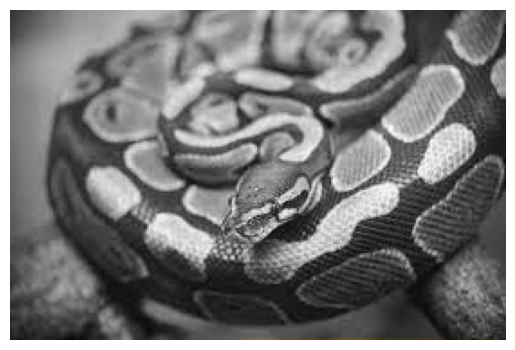

In [42]:
plt.imshow(new_image)
plt.axis('off')
plt.show()

In [43]:
times

[0.08243799209594727,
 0.0013549327850341797,
 0.0007569789886474609,
 0.0008955001831054688,
 0.0006525516510009766,
 0.0006351470947265625,
 0.0006105899810791016,
 0.0006227493286132812,
 0.0008649826049804688]

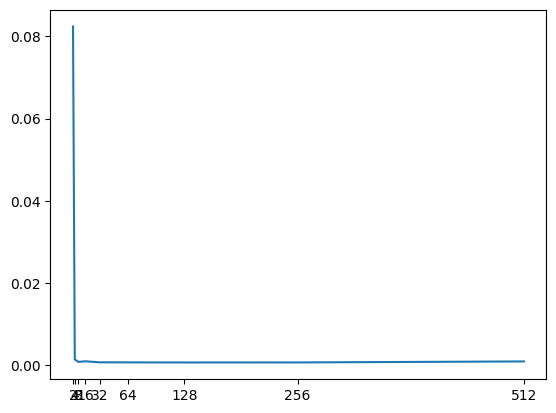

In [44]:
plt.plot(blocks, times)
plt.xticks(blocks)
plt.show()

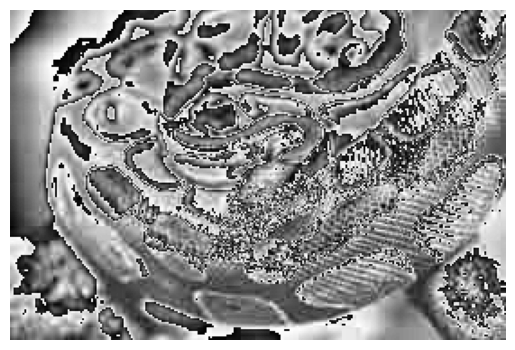

In [46]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

img = plt.imread('python.jpg')
red = img[:, :, 0]
green = img[:, :, 1]
blue = img[:, :, 2]

start_time = time.time()

# convert image to grayscale
gray_img = (red + green + blue)/3

cpu_time = time.time() - start_time

plt.imshow(gray_img, cmap=plt.get_cmap("gray"))
plt.axis('off')
plt.show()

In [39]:
cpu_time

0.0002467632293701172